# Problem Statement:
#### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
#### Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [157]:
data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\ExcelR\\Data Science Assignments\\15_Random Forest\\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [158]:
data.shape

(400, 11)

In [159]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [160]:
# Creating Caterogical data on Sales Variable :

print("Length of Sales Variable : ",len(data["Sales"]))
print("Mean of Sales Variable : ",data["Sales"].mean())
data["Sales"].sort_values()

Length of Sales Variable :  400
Mean of Sales Variable :  7.496325


174     0.00
106     0.16
165     0.37
143     0.53
57      0.91
       ...  
18     13.91
367    14.37
25     14.90
316    15.63
376    16.27
Name: Sales, Length: 400, dtype: float64

In [161]:
data["highsales"] = np.where((data["Sales"] < 9),"Low","High")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [162]:
data["highsales"].describe()

count     400
unique      2
top       Low
freq      286
Name: highsales, dtype: object

In [163]:
data_new = data.iloc[:,1:]
data_new

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [164]:
#Complete Company dataset :

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data_new["ShelveLoc"]= label_encoder.fit_transform(data_new["ShelveLoc"])
data_new["Urban"]= label_encoder.fit_transform(data_new["Urban"])
data_new["US"]= label_encoder.fit_transform(data_new["US"])
data_new["highsales"]= label_encoder.fit_transform(data_new["highsales"])

data_new.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [165]:
array = data_new.values
X = array[:,:-1]
y = array[:,-1]

In [205]:
# Splitting data into train and test dataset :
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [206]:
# Creating Model :

model = RandomForestClassifier(n_estimators = 100, max_features = 4)
model.fit(X_train,y_train)

RandomForestClassifier(max_features=4)

In [207]:
# Prediction and Accuracy on train dataset :

predict = model.predict(X_train)
pd.Series(predict).value_counts()

1    225
0     95
dtype: int64

In [208]:
pd.crosstab(y_train,predict)

col_0,0,1
row_0,,
0,95,0
1,0,225


In [209]:
# Accuracy :
np.mean(predict == y_train)

1.0

In [210]:
# Prediction and Accuracy on train dataset :

predict = model.predict(X_test)
pd.Series(predict).value_counts()

1    67
0    13
dtype: int64

In [211]:
pd.crosstab(y_test,predict)

col_0,0,1
row_0,,
0,10,9
1,3,58


In [212]:
# Accuracy :
np.mean(predict == y_test)

0.85

In [214]:
# Get Importance Feature :

importance = model.feature_importances_
importance

array([0.10455649, 0.08865665, 0.12864828, 0.0933991 , 0.24523798,
       0.12373653, 0.1245475 , 0.05817549, 0.01243727, 0.02060472])

<AxesSubplot:>

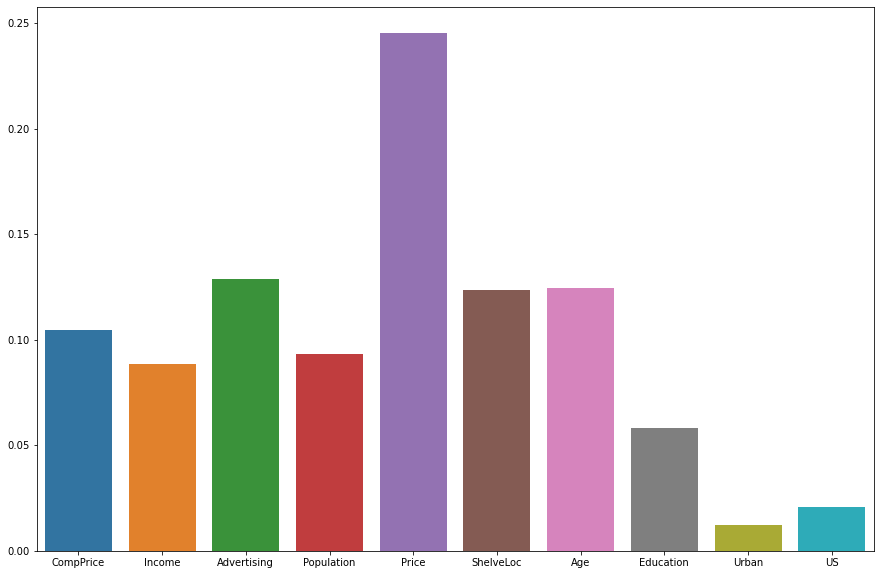

In [218]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(x=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"],y=model.feature_importances_)